In [76]:
# Para el manejo eficiente del conjunto de datos
import pandas as pd 
import numpy as np
# Para el manejo de modelos estadísticos
from scipy import stats
# Para construir los elementos gráficos
import seaborn as sns 
import matplotlib.pyplot as plt
# Para la visualización de los valores nulos
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import os
import datetime as dt

### Planteamiento del problema

En las últimas décadas se ha venido registrando según un estudio una disminución en la tasa de natalidad, en 1950 la tasa de natalidad estaba alrededor de 4 nacimiento por mujer, hoy en día la tasa de natalidad esta aproximadamente en 2 nacimientos por mujer. Este fenómeno está impulsado por el hecho de que más mujeres están accediendo a la educación, al trabajo, así como por el mayor acceso a métodos anticonceptivos, que hace que las mujeres puedan elegir tener menos niños.

En el presente trabajo nos adentraremos en los datos recabados por el SINAC (Subsistema de Información sobre Nacimientos) en la cual observaremos el comportamiento de los nacimientos en los últimos años.


### Extraccion y Transformacion
Toda la parte de Extraccion, Transformacion de los datos se realizan en el Script que se encuentra en el directorio principal: ETL.py


In [77]:
#runfile('C:/Users/benja/OneDrive/Documentos/GitHub/ProyectoFinal_IC/ETL.py', wdir='C:/Users/benja/OneDrive/Documentos/GitHub/ProyectoFinal_IC')

### Carga de los Datos

In [78]:
TotalNacimientosSonora=pd.read_csv('TotalNacimientos2017_2020.csv')

### Limpieza de datos: Manejo de valores faltantes, duplicados, perdidos y deteccion de outliers.

In [79]:
TotalNacimientosSonora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165518 entries, 0 to 165517
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ENTIDADNACIMIENTO        165518 non-null  int64  
 1   MUNICIPIONACIMIENTO      165518 non-null  float64
 2   FECHANACIMIENTOMADRE     165518 non-null  object 
 3   EDAD                     165518 non-null  int64  
 4   ESTADOCONYUGAL           165518 non-null  int64  
 5   ENTIDADRESIDENCIA        165518 non-null  int64  
 6   MUNICIPIORESIDENCIA      165518 non-null  int64  
 7   LOCALIDADRESIDENCIA      165518 non-null  int64  
 8   NUMEROEMBARAZOS          165518 non-null  int64  
 9   HIJOSNACIDOSMUERTOS      165518 non-null  int64  
 10  HIJOSNACIDOSVIVOS        165518 non-null  int64  
 11  HIJOSSOBREVIVIENTES      165518 non-null  int64  
 12  CONDICIONHIJOANTERIOR    165518 non-null  int64  
 13  VIVEHIJOANTERIOR         165518 non-null  int64  
 14  ORDE

<AxesSubplot:>

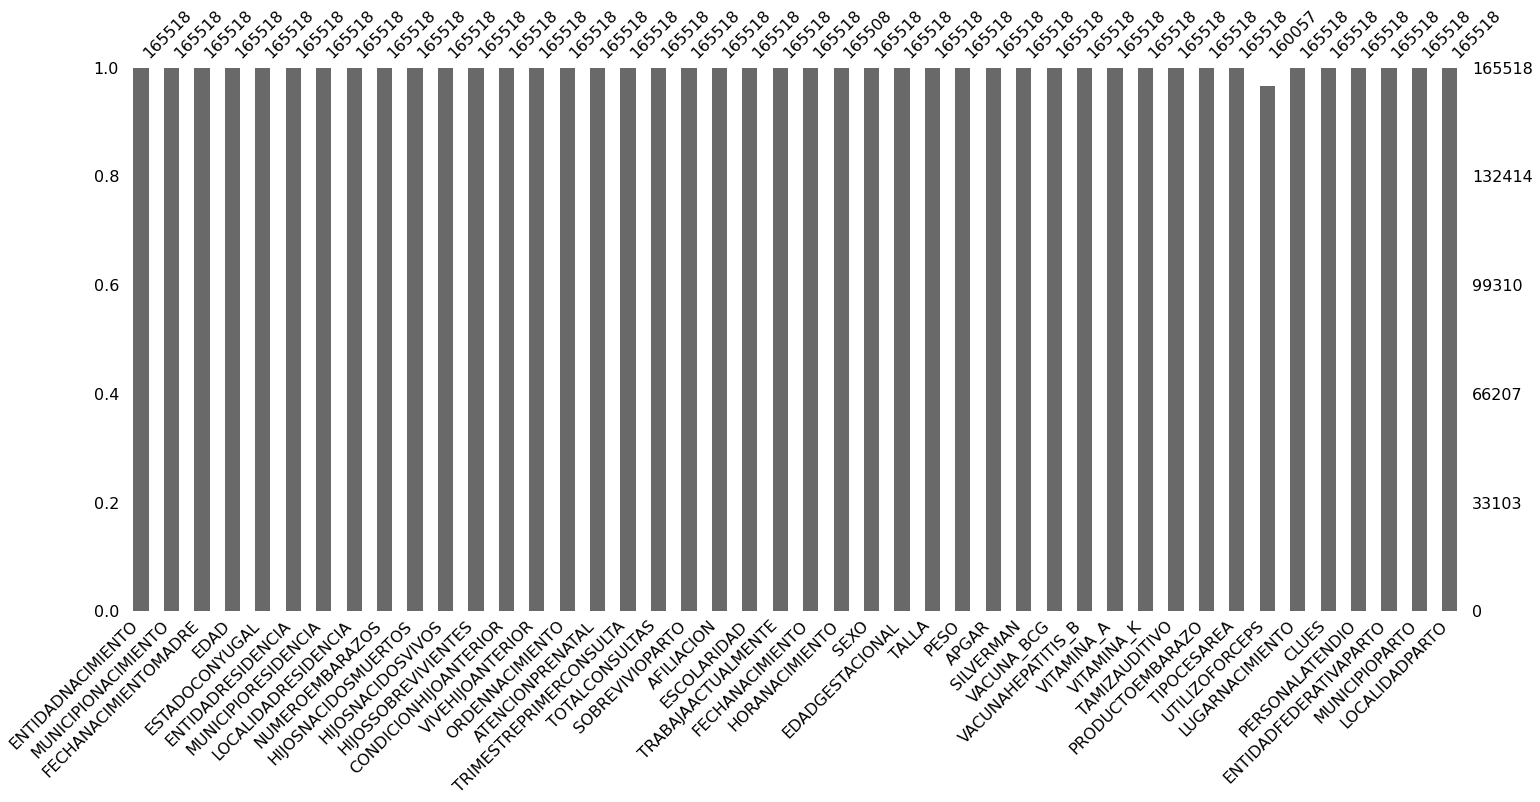

In [80]:
msno.bar(TotalNacimientosSonora)

<AxesSubplot:>

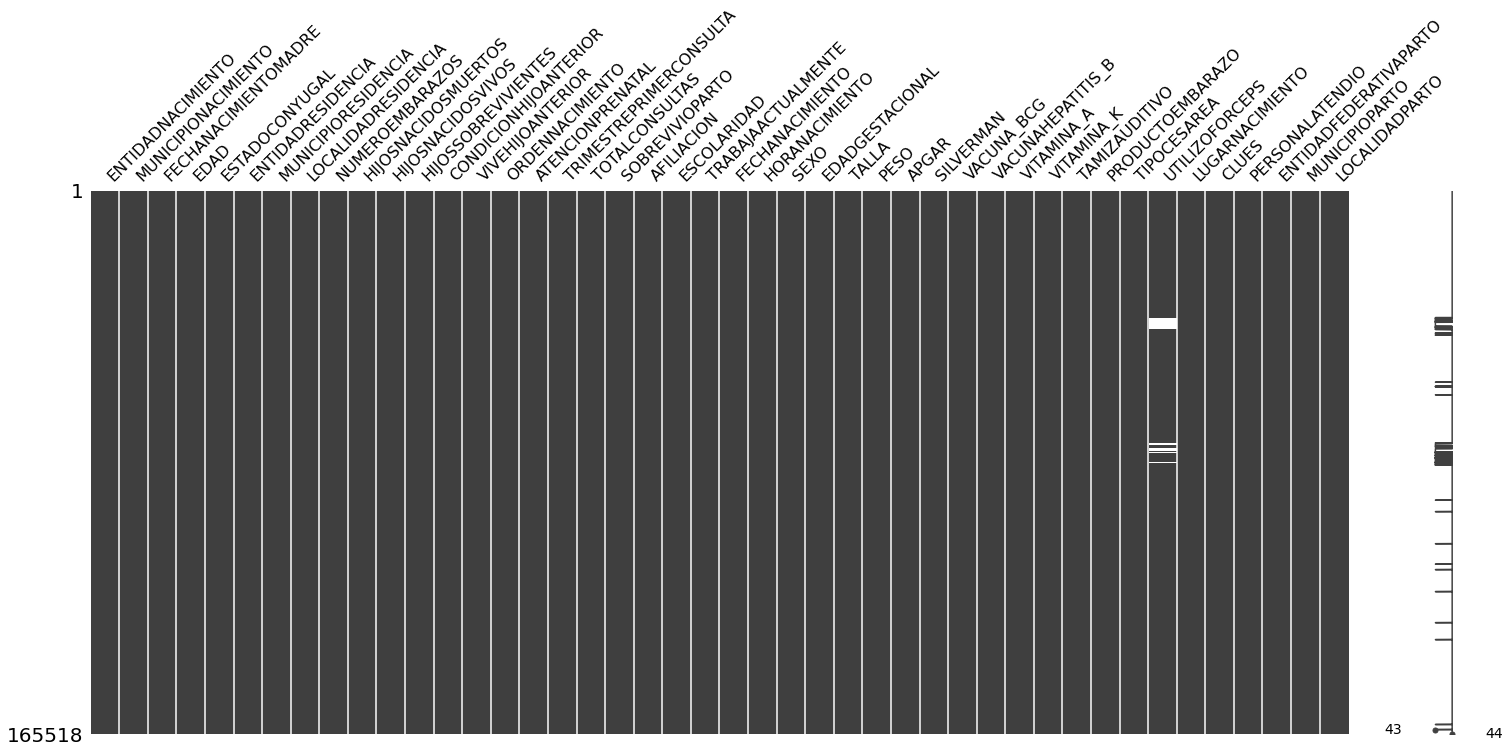

In [81]:
msno.matrix(TotalNacimientosSonora)

In [82]:
s = TotalNacimientosSonora.isnull().sum()
result = pd.concat([s,s/len(TotalNacimientosSonora)],1)
result.columns = ["missing_count","missing_ratio"]
result
    

,missing_count,missing_ratio
ENTIDADNACIMIENTO,0,0.000000
MUNICIPIONACIMIENTO,0,0.000000
FECHANACIMIENTOMADRE,0,0.000000
EDAD,0,0.000000
ESTADOCONYUGAL,0,0.000000
ENTIDADRESIDENCIA,0,0.000000
MUNICIPIORESIDENCIA,0,0.000000
LOCALIDADRESIDENCIA,0,0.000000
NUMEROEMBARAZOS,0,0.000000
HIJOSNACIDOSMUERTOS,0,0.000000


In [83]:
TotalNacimientosSonora['HORANACIMIENTO'].isna().sum()

10

In [84]:
missing_df = TotalNacimientosSonora[TotalNacimientosSonora['HORANACIMIENTO'].isna()]
pd.set_option('display.max_columns', None)
missing_df


,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,FECHANACIMIENTOMADRE,EDAD,ESTADOCONYUGAL,ENTIDADRESIDENCIA,MUNICIPIORESIDENCIA,LOCALIDADRESIDENCIA,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,HIJOSNACIDOSVIVOS,HIJOSSOBREVIVIENTES,CONDICIONHIJOANTERIOR,VIVEHIJOANTERIOR,ORDENNACIMIENTO,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,AFILIACION,ESCOLARIDAD,TRABAJAACTUALMENTE,FECHANACIMIENTO,HORANACIMIENTO,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,VACUNA_BCG,VACUNAHEPATITIS_B,VITAMINA_A,VITAMINA_K,TAMIZAUDITIVO,PRODUCTOEMBARAZO,TIPOCESAREA,UTILIZOFORCEPS,LUGARNACIMIENTO,CLUES,PERSONALATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO
94235,26,18.0,07/04/2000,18,15,26,55,1,2,0,2,2,1,1,2,1,2,5,1,7,4,2,02/07/2018,NaN,2,41,55,3800,9,0,1,2,1,1,1,1,1,0.0,1,SRSSA002085,14.0,26,55,1
97720,25,18.0,26/03/1984,34,11,26,29,1,2,0,2,2,1,1,2,1,1,9,1,3,7,2,26/07/2018,NaN,1,39,48,2600,9,0,2,2,2,1,2,9,1,0.0,4,9998,11.0,26,29,1
107487,34,997.0,01/11/1991,27,11,99,998,9998,2,0,2,2,1,1,2,9,9,99,1,99,3,2,14/08/2018,NaN,1,39,49,2750,8,0,1,2,1,1,1,1,1,0.0,1,SRSSA002085,14.0,26,55,1
113717,26,17.0,30/06/2003,15,15,26,17,80,1,0,1,1,3,0,1,1,1,7,1,7,4,2,01/09/2018,NaN,2,37,52,2860,9,0,2,2,2,1,2,1,1,0.0,1,SRSSA006261,14.0,26,17,1
115377,26,2.0,12/03/2000,18,11,26,2,1,1,0,1,1,3,0,1,1,1,9,1,7,7,2,26/06/2018,NaN,9,99,52,3200,9,0,2,2,1,1,2,1,1,0.0,1,SRSSA017671,14.0,26,2,1
122072,26,55.0,07/08/2000,18,99,26,55,1,1,0,1,1,3,0,1,1,1,7,1,7,7,2,26/06/2018,NaN,2,39,50,3610,99,0,1,2,1,1,8,1,2,0.0,1,SRSSA002085,11.0,26,55,1
131525,26,17.0,23/05/2000,19,15,26,17,246,2,0,2,2,1,1,2,1,9,4,1,7,6,2,10/10/2019,NaN,2,38,53,2990,7,2,2,2,2,1,2,1,2,0.0,1,SRSSA006261,11.0,26,17,1
136689,26,17.0,01/01/1999,20,12,26,17,1,1,0,1,1,3,0,1,1,9,5,1,7,5,2,30/03/2019,NaN,9,39,56,3720,9,0,2,2,2,1,2,1,2,0.0,1,SRSSA006261,11.0,26,17,1
162532,26,42.0,16/07/1988,31,11,26,30,1,3,0,3,3,1,1,3,1,9,99,1,8,7,1,23/09/2019,NaN,2,33,40,1490,99,5,2,2,2,1,2,1,1,0.0,8,SRSME000011,11.0,26,30,1
164077,25,1.0,29/07/1987,32,11,26,30,1,4,0,3,3,1,1,3,1,1,8,1,8,7,1,20/12/2019,NaN,1,38,51,9999,9,0,2,2,2,1,8,1,2,0.0,8,SRSME000011,11.0,26,30,1


In [85]:
TotalNacimientosSonora.sort_values(by=['FECHANACIMIENTO','HORANACIMIENTO'])
#Imputamos los datos faltantes de la columna H
TotalNacimientosSonora["HORANACIMIENTO"].fillna( method="pad", inplace = True)


In [86]:
#Imputamos los datos faltantes de la columna UTILIZOFORCEPS ya que en el catalogo original ofrecido por el sinac se establece que cuando se ignora el resultado se le asigna el valor 9
TotalNacimientosSonora["UTILIZOFORCEPS"].fillna(9, inplace = True) 


In [87]:
duplicates = TotalNacimientosSonora.duplicated()
print(f'Number of repeated rows: {duplicates.sum()}')
TotalNacimientosSonora.drop_duplicates(inplace=True, ignore_index=True)
print(f'Number of remaining rows: {len(TotalNacimientosSonora)}')

Number of repeated rows: 10
Number of remaining rows: 165508


In [88]:
TotalNacimientosSonora.HORANACIMIENTO=TotalNacimientosSonora.HORANACIMIENTO.replace('99:99','23:59')

In [89]:
TotalNacimientosSonora.MUNICIPIONACIMIENTO=TotalNacimientosSonora.MUNICIPIONACIMIENTO.astype(np.int64)
TotalNacimientosSonora.FECHANACIMIENTO=TotalNacimientosSonora.FECHANACIMIENTO.astype('datetime64[ns]')
TotalNacimientosSonora.FECHANACIMIENTOMADRE=TotalNacimientosSonora.FECHANACIMIENTO.astype('datetime64[ns]')
TotalNacimientosSonora.PERSONALATENDIO=TotalNacimientosSonora.PERSONALATENDIO.astype(np.int64)
TotalNacimientosSonora.UTILIZOFORCEPS=TotalNacimientosSonora.UTILIZOFORCEPS.astype(np.int64)

In [90]:
TotalNacimientosSonora.HORANACIMIENTO= pd.to_datetime(TotalNacimientosSonora.HORANACIMIENTO,format= '%H:%M',exact=False ).dt.time

In [91]:
TotalNacimientosSonora.HORANACIMIENTO.dtypes

dtype('O')

Procedemos a revisar una variable de interes: EDADl, exploraremos sus valores y veremos si obtendremos valores dentro del rango de edad de una persona fertil.

In [92]:
TotalNacimientosSonora['EDAD'] .describe()

count    165508.000000
mean         25.509824
std          10.319723
min           0.000000
25%          20.000000
50%          25.000000
75%          30.000000
max         999.000000
Name: EDAD, dtype: float64

Observamos que el valor maximo y minimo son valores irreales para una persona fertil, por lo cual procedemos a eliminar esos datos.

In [93]:
TotalNacimientosSonora=TotalNacimientosSonora[TotalNacimientosSonora['EDAD']!=0]
TotalNacimientosSonora=TotalNacimientosSonora[TotalNacimientosSonora['EDAD']!=999]

In [94]:
TotalNacimientosSonora['EDAD'] .describe()

count    164443.000000
mean         25.608211
std           6.293842
min          10.000000
25%          21.000000
50%          25.000000
75%          30.000000
max          99.000000
Name: EDAD, dtype: float64

Seguimos observando que el valor maximo es el de 99, el cual no es un valor adecuado por lo que procederemos a eliminarlo.

In [95]:
TotalNacimientosSonora=TotalNacimientosSonora[TotalNacimientosSonora['EDAD']!=99]

In [96]:
TotalNacimientosSonora['EDAD'] .describe()

count    164429.000000
mean         25.601962
std           6.257568
min          10.000000
25%          21.000000
50%          25.000000
75%          30.000000
max          56.000000
Name: EDAD, dtype: float64

In [97]:
TotalNacimientosSonora[TotalNacimientosSonora['EDAD']==0]

,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,FECHANACIMIENTOMADRE,EDAD,ESTADOCONYUGAL,ENTIDADRESIDENCIA,MUNICIPIORESIDENCIA,LOCALIDADRESIDENCIA,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,HIJOSNACIDOSVIVOS,HIJOSSOBREVIVIENTES,CONDICIONHIJOANTERIOR,VIVEHIJOANTERIOR,ORDENNACIMIENTO,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,AFILIACION,ESCOLARIDAD,TRABAJAACTUALMENTE,FECHANACIMIENTO,HORANACIMIENTO,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,VACUNA_BCG,VACUNAHEPATITIS_B,VITAMINA_A,VITAMINA_K,TAMIZAUDITIVO,PRODUCTOEMBARAZO,TIPOCESAREA,UTILIZOFORCEPS,LUGARNACIMIENTO,CLUES,PERSONALATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO


In [98]:
NacimientosPorEdad_Profesionista=TotalNacimientosSonora.groupby(['EDAD','ESCOLARIDAD']).size().reset_index(name='Total').sort_values(by='Total',ascending=False)

In [99]:
df_escolaridad=pd.read_excel('./datos/ESCOLARIDAD.xlsx')

In [100]:
si_no=pd.read_excel("./datos/SI_NO.xlsx")
NacimientosPorEdad_Profesionista=TotalNacimientosSonora.groupby(['EDAD','ESCOLARIDAD']).size().reset_index(name='Total').sort_values(by='Total',ascending=False)

In [101]:
NacimientosPorEdad_Profesionista.sort_values(by=['EDAD','ESCOLARIDAD'])

,EDAD,ESCOLARIDAD,Total
0,10,2,1
1,10,3,2
2,11,4,1
3,11,5,1
4,11,6,1
...,...,...,...
839,52,8,2
840,53,81,1
841,54,5,1
842,56,52,1


In [102]:
TotalNacimientosSonora['ESCOLARIDAD']

0         82
1         81
2         71
3         72
4         71
          ..
165503     7
165504     6
165505    11
165506     5
165507     8
Name: ESCOLARIDAD, Length: 164429, dtype: int64

<AxesSubplot:>

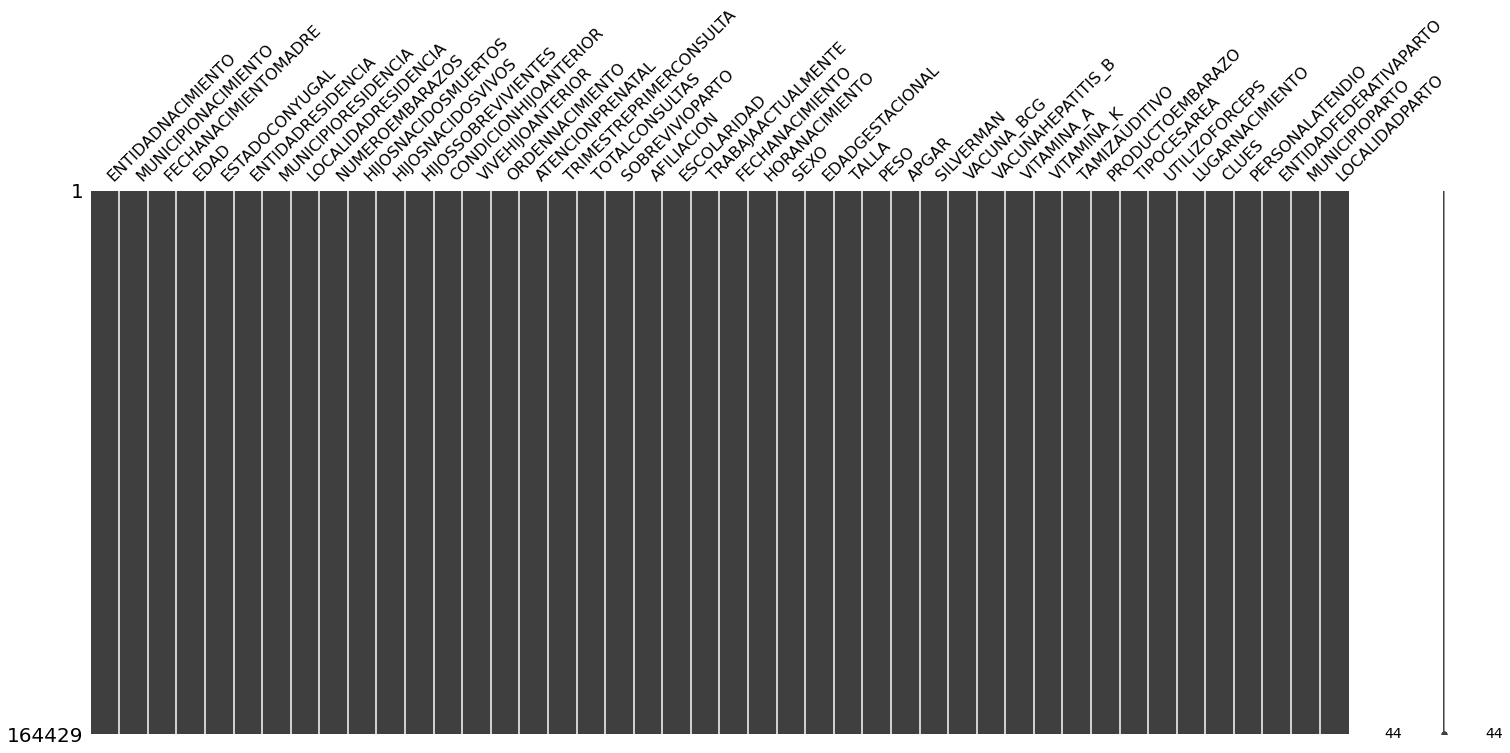

In [103]:
msno.matrix(TotalNacimientosSonora)

<AxesSubplot:>

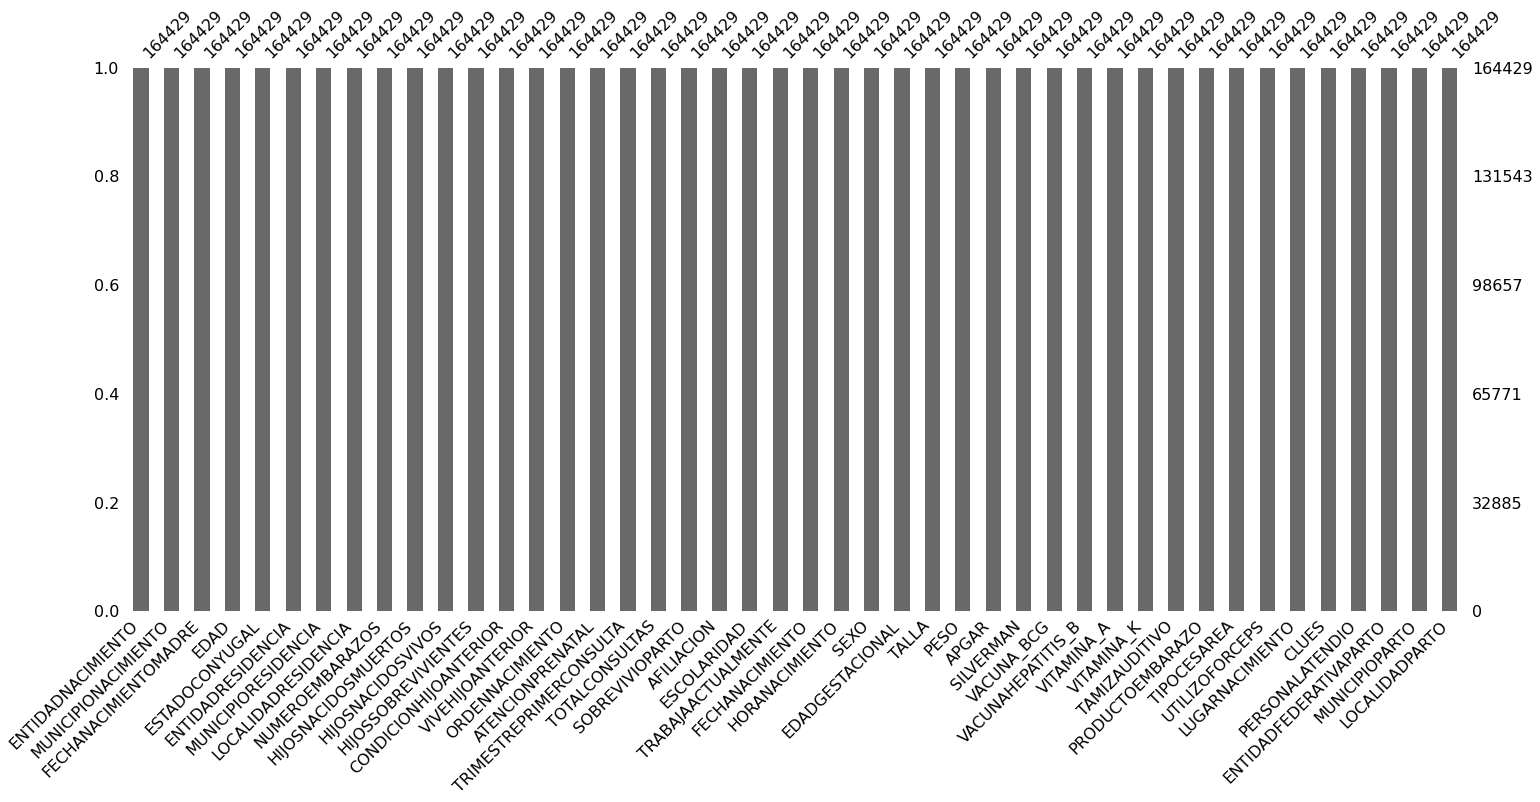

In [104]:
msno.bar(TotalNacimientosSonora)

In [105]:
TotalNacimientosSonora.to_csv('TotalNacimientos cleaned data.csv')

In [106]:
TotalNacimientosSonora.shape

(164429, 44)

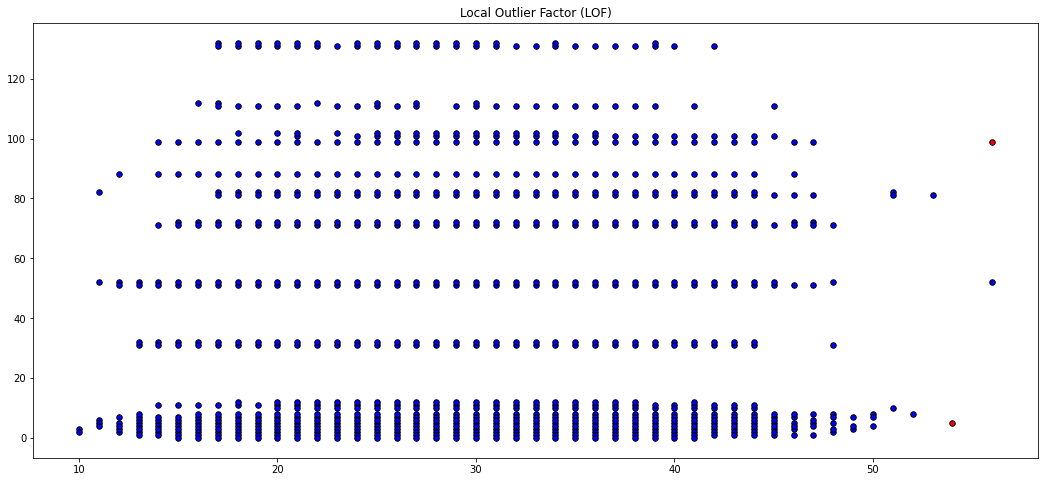

In [107]:
clf = LocalOutlierFactor(n_neighbors=60, contamination='auto')
X = NacimientosPorEdad_Profesionista[['EDAD', 'ESCOLARIDAD']].values
y_pred = clf.fit_predict(X)

plt.figure(figsize=(18,8))
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]
plt.title("Local Outlier Factor (LOF)")
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)

b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.show()

In [108]:
print(X[out_mask, 0])
print(X[out_mask, 1])

[54 56]
[ 5 99]


Para este caso solo eliminaremos los valore de edad que son 0, 99,999, ya que si bien no es muy comun si es posible que una mujer quede embarazada a los 54, 56 años.

### Analisis Exploratorio de Datos

Este se llevara a cabo en el mediante tableau en el siguiente link: https://public.tableau.com/app/profile/benjamin.lopez.mendoza8106/viz/NatalidadSonora/NatalidadenSonora2017-2020?publish=yes

